In [ ]:
# Install required packages (if not already installed)
!pip install kagglehub
!pip install prophet

# Import kagglehub and os for dataset download and file management
import kagglehub
import os

# Download the latest version of the Telco Customer Churn dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)


100%|██████████| 172k/172k [00:00<00:00, 46.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [ ]:
import pandas as pd

# The Telco Customer Churn dataset is typically stored under the name "WA_Fn-UseC_-Telco-Customer-Churn.csv".
# Adjust the file name if necessary.
file_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(os.path.join(path, file_name))

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Display basic information and summary statistics
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Preview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [ ]:
# Convert TotalCharges to numeric (it might be read as a string) and handle non-numeric entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Fill any remaining missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Optionally, drop columns that are not useful (e.g., 'customerID')
if 'customerID' in df.columns:
    df.drop(['customerID'], axis=1, inplace=True)

# Display the cleaned data preview
print("\nCleaned Data Preview:")
print(df.head())



Cleaned Data Preview:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SME

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable (Churn)
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn_Yes', data=df, palette='viridis')
# Note: After one-hot encoding, the target might be represented as "Churn_Yes"
plt.title("Distribution of Customer Churn")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Plot histograms for selected numerical features
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title("Distribution of Tenure")

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='salmon')
plt.title("Distribution of Monthly Charges")

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True, color='limegreen')
plt.title("Distribution of Total Charges")

plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1
Dataset Preview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     F

<ipython-input-2-311975ea6d07>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Yes', data=df, palette='viridis')


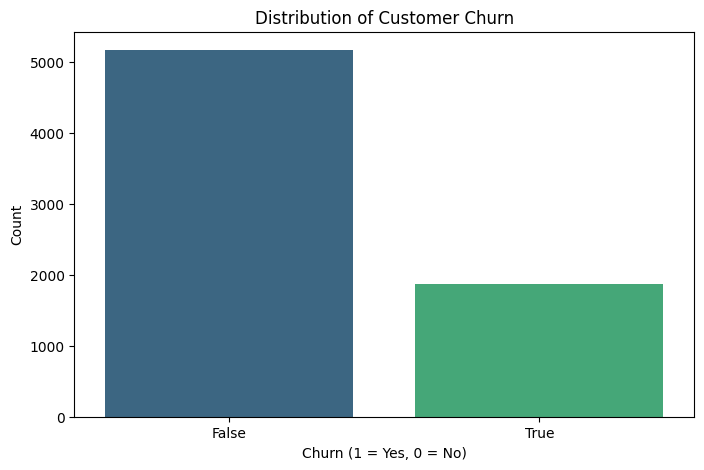

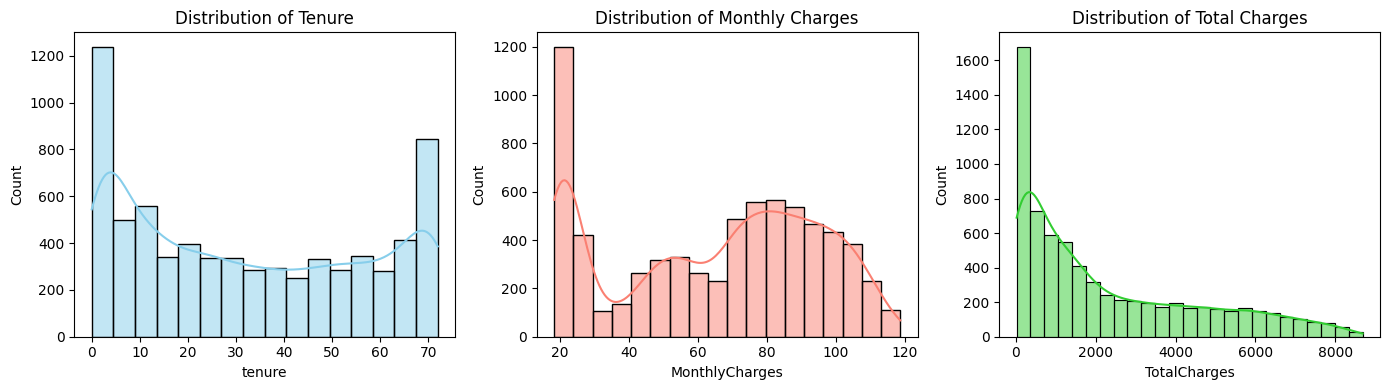

In [ ]:
# Install required packages (if not already installed)
!pip install kagglehub
!pip install prophet

# Import kagglehub and os for dataset download and file management
import kagglehub
import os

# Download the latest version of the Telco Customer Churn dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

import pandas as pd

# The Telco Customer Churn dataset is typically stored under the name "WA_Fn-UseC_-Telco-Customer-Churn.csv".
# Adjust the file name if necessary.
file_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(os.path.join(path, file_name))

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Display basic information and summary statistics
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())


# Convert TotalCharges to numeric (it might be read as a string) and handle non-numeric entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Fill any remaining missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Optionally, drop columns that are not useful (e.g., 'customerID')
if 'customerID' in df.columns:
    df.drop(['customerID'], axis=1, inplace=True)

# Display the cleaned data preview
print("\nCleaned Data Preview:")
print(df.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable (Churn)
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn_Yes', data=df, palette='viridis')
# Note: After one-hot encoding, the target might be represented as "Churn_Yes"
plt.title("Distribution of Customer Churn")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Plot histograms for selected numerical features
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title("Distribution of Tenure")

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='salmon')
plt.title("Distribution of Monthly Charges")

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True, color='limegreen')
plt.title("Distribution of Total Charges")

plt.tight_layout()
plt.show()

In [ ]:
# Install PyCaret if not already installed (you can uncomment the following line if needed)
!pip install pycaret

from pycaret.classification import setup, compare_models, create_model, evaluate_model, save_model

# Initialize the PyCaret environment.
# Here, 'Churn_Yes' is our target column (resulting from one-hot encoding of the original 'Churn').
clf_setup = setup(data=df, target='Churn_Yes', normalize=True, session_id=123, silent=True, verbose=False)

# Compare several models and automatically select the best one based on cross-validation performance.
best_model = compare_models()

# Create the best model on the full dataset.
final_model = create_model(best_model)

# Evaluate the model performance using PyCaret's interactive plots (confusion matrix, ROC curve, etc.)
evaluate_model(final_model)

# Save the final model for deployment or future use.
save_model(final_model, 'customer_churn_model')


NameError: name 'df' is not defined

In [ ]:
# Install PyCaret if not already installed (you can uncomment the following line if needed)
!pip install -- pre pycaret

from pycaret.classification import setup, compare_models, create_model, evaluate_model, save_model
import pandas as pd
import kagglehub
import os

# Download the latest version of the Telco Customer Churn dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

# The Telco Customer Churn dataset is typically stored under the name "WA_Fn-UseC_-Telco-Customer-Churn.csv".
# Adjust the file name if necessary.
file_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(os.path.join(path, file_name))

# Convert TotalCharges to numeric (it might be read as a string) and handle non-numeric entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Fill any remaining missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Optionally, drop columns that are not useful (e.g., 'customerID')
if 'customerID' in df.columns:
    df.drop(['customerID'], axis=1, inplace=True)


# Initialize the PyCaret environment.
# Here, 'Churn_Yes' is our target column (resulting from one-hot encoding of the original 'Churn').
# The target column is 'Churn_Yes' after one-hot encoding
# Use the correct target column name

from pycaret.classification import setup, compare_models, create_model, evaluate_model, save_model

# Initialize the PyCaret environment.
# Here, 'Churn_Yes' is our target column (resulting from one-hot encoding of the original 'Churn').
clf_setup = setup(data=df, target='Churn_Yes', normalize=True, session_id=123,  verbose=False)

# Compare several models and automatically select the best one based on cross-validation performance.
best_model = compare_models()

# Create the best model on the full dataset.
final_model = create_model(best_model)

# Evaluate the model performance using PyCaret's interactive plots (confusion matrix, ROC curve, etc.)
evaluate_model(final_model)

# Save the final model for deployment or future use.
save_model(final_model, 'customer_churn_model')

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8020,0.8463,0.4970,0.6741,0.5703,0.4459,0.4556,26.8360
rf,Random Forest Classifier,0.7998,0.8347,0.4657,0.6809,0.5516,0.4288,0.4424,15.1770
ada,Ada Boost Classifier,0.7982,0.8458,0.5329,0.6471,0.5837,0.4522,0.4565,10.2560
svm,SVM - Linear Kernel,0.7972,0.8298,0.4374,0.6882,0.5330,0.4118,0.4300,4.8200
lightgbm,Light Gradient Boosting Machine,0.7911,0.8347,0.5345,0.6244,0.5748,0.4378,0.4408,7.7680
et,Extra Trees Classifier,0.7890,0.8252,0.4450,0.6518,0.5275,0.3981,0.4109,21.0320
ridge,Ridge Classifier,0.7870,0.8379,0.3234,0.7251,0.4458,0.3371,0.3800,7.4410
xgboost,Extreme Gradient Boosting,0.7846,0.8238,0.5390,0.6053,0.5697,0.4268,0.4284,22.2140
lr,Logistic Regression,0.7844,0.8375,0.3066,0.7253,0.4295,0.3226,0.3689,5.9030
dt,Decision Tree Classifier,0.7625,0.6791,0.5016,0.5590,0.5282,0.3702,0.3715,4.7200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8012,0.8472,0.5692,0.6379,0.6016,0.4698,0.4711
1,0.7931,0.8319,0.5077,0.6346,0.5641,0.4307,0.4353
2,0.7992,0.8221,0.4656,0.6778,0.5520,0.4283,0.4408
3,0.8032,0.8424,0.4656,0.6932,0.5571,0.4368,0.4511
4,0.7830,0.8290,0.4885,0.6154,0.5447,0.4047,0.4093
5,0.7972,0.8394,0.5191,0.6476,0.5763,0.4451,0.4498
6,0.8174,0.8702,0.5191,0.7158,0.6018,0.4872,0.4978
7,0.8032,0.8515,0.4809,0.6848,0.5650,0.4429,0.4544
8,0.8256,0.8731,0.5496,0.7273,0.6261,0.5152,0.5238


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude...
                                             criterion='friedman_mse', init=None,
                                             learni

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8090,0.8780,0.5035,0.6929,0.5832,0.4633,0.4733


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'prediction_label', 'prediction_score_0',
       'prediction_score_1'],
      dtype='object', length=7076)


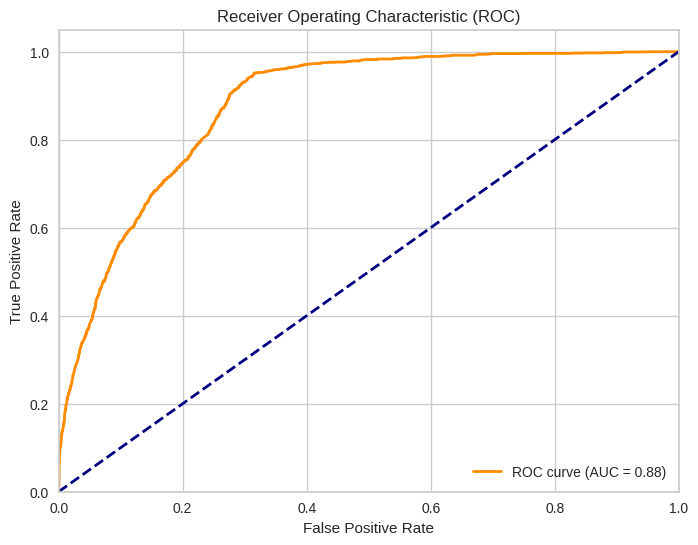

In [ ]:
from sklearn.metrics import roc_curve, auc
from pycaret.classification import predict_model # Import predict_model
import matplotlib.pyplot as plt # Import the matplotlib library

# Get predicted probabilities using PyCaret's predict_model function with raw_score=True.
predictions_proba = predict_model(final_model, data=df, raw_score=True)

# Check the column names in predictions_proba
print(predictions_proba.columns)

# Instead of assuming 'Score_1', get the column name for the positive class probability dynamically
# This approach ensures compatibility with different classifiers and PyCaret versions
# If the column 'Score_1' exists, use it; otherwise, use the 'Score' column if it exists
positive_class_column = 'Score_1' if 'Score_1' in predictions_proba.columns else ('Score' if 'Score' in predictions_proba.columns else predictions_proba.columns[-1])

y_proba = predictions_proba[positive_class_column]

# Actual target values.
y_true = df['Churn_Yes']

# Compute ROC curve and Area Under the Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()